# Nuages de mots

## Imports et stopwords

In [370]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [371]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [372]:
# Choisir une année
year = 1908

In [373]:
# Lister les fichiers de cette année
data_path = '../../data/corpus'
txt_path = '../../data/corpus/txt'
txt_clean = '../../data/corpus/tmp/clean'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB567_1908-09-03_01-00002.txt',
 'KB_JB638_1908-10-26_01-00002.txt',
 'KB_JB838_1908-10-27_01-00001.txt',
 'KB_JB638_1908-08-28_01-00002.txt',
 'KB_JB572_1908-05-03_01-00002.txt',
 'KB_JB729_1908-04-28_01-00003.txt',
 'KB_JB555_1908-09-06_01-00002.txt',
 'KB_JB572_1908-08-18_01-00002.txt',
 'KB_JB685_1908-04-04_01-0002.txt',
 'KB_JB638_1908-06-11_02-00004.txt',
 'KB_JB638_1908-09-10_02-00002.txt',
 'KB_JB567_1908-08-09_01-00001.txt',
 'KB_JB421_1908-06-27_01-00001.txt',
 'KB_JB555_1908-05-20_01-00002.txt',
 'KB_JB567_1908-04-16_01-00001.txt',
 'KB_JB572_1908-04-20_01-00003.txt',
 'KB_JB567_1908-07-18_01-00002.txt',
 'KB_JB838_1908-07-11_01-00003.txt',
 'KB_JB555_1908-05-07_01-00003.txt',
 'KB_JB555_1908-07-05_01-00003.txt',
 'KB_JB638_1908-06-20_01-00002.txt',
 'KB_JB567_1908-12-14_01-00002.txt',
 'KB_JB555_1908-04-13_01-00002.txt',
 'KB_JB638_1908-04-13_02-00004.txt',
 'KB_JB567_1908-08-11_01-00001.txt',
 'KB_JB638_1908-07-28_02-00003.txt',
 'KB_JB555_1908-03-06_01-00002.txt',
 '

In [374]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    print(txt)
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

KB_JB567_1908-09-03_01-00002.txt
KB_JB638_1908-10-26_01-00002.txt
KB_JB838_1908-10-27_01-00001.txt
KB_JB638_1908-08-28_01-00002.txt
KB_JB572_1908-05-03_01-00002.txt
KB_JB729_1908-04-28_01-00003.txt
KB_JB555_1908-09-06_01-00002.txt
KB_JB572_1908-08-18_01-00002.txt
KB_JB685_1908-04-04_01-0002.txt
KB_JB638_1908-06-11_02-00004.txt
KB_JB638_1908-09-10_02-00002.txt
KB_JB567_1908-08-09_01-00001.txt
KB_JB421_1908-06-27_01-00001.txt
KB_JB555_1908-05-20_01-00002.txt
KB_JB567_1908-04-16_01-00001.txt
KB_JB572_1908-04-20_01-00003.txt
KB_JB567_1908-07-18_01-00002.txt
KB_JB838_1908-07-11_01-00003.txt
KB_JB555_1908-05-07_01-00003.txt
KB_JB555_1908-07-05_01-00003.txt
KB_JB638_1908-06-20_01-00002.txt
KB_JB567_1908-12-14_01-00002.txt
KB_JB555_1908-04-13_01-00002.txt
KB_JB638_1908-04-13_02-00004.txt
KB_JB567_1908-08-11_01-00001.txt
KB_JB638_1908-07-28_02-00003.txt
KB_JB555_1908-03-06_01-00002.txt
KB_JB729_1908-03-13_01-00002.txt
KB_JB421_1908-05-08_01-00002.txt
KB_JB729_1908-05-14_01-00001.txt
KB_JB567_19

In [375]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

218

In [376]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"- itai ; c «S-X!- >» ni r ■__■—-_ . ontraction réflexe et du c)onus musculaire Je l'homme •: du D' Couraud (Anvers), sur « les traumatismcs du segment lombo-sacré du rachis »; du professeur Beolère (P"

In [377]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/corpus/tmp/txt'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [378]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"- itai ; c «S-X!- >» ni r ■__■—-_ . ontraction réflexe et du c)onus musculaire Je l'homme •: du D' Couraud (Anvers), sur « les traumatismcs du segment lombo-sacré du rachis »; du professeur Beolère (Paris), sur « l'exploration radiologiquo du foie »; du 3D r Klijvens (Anvers) sur « les arthrites talbé- tiquee comino symptômes précoces du tabès»; du TT de Nobel (Gand), sur « lo traitement des akjuiea du pied par les courants do haute fréquence ■; du D r Guilloz (Nancy), sur i le transport élqfftr"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [379]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/txt/{year}.txt"
        output_path = f"{folder}/clean/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 3 and len(w) < 25 and w.isalpha() and w not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [380]:
temp= '../../data/corpus/tmp'
clean_text(year, folder=temp)

'Output has been written in ../../data/corpus/tmp/clean/1908_clean.txt!'

In [381]:
# Vérifier le résultat
with open(os.path.join(txt_clean, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'itai ontraction réflexe onus musculaire homme couraud anvers traumatismcs segment lombo sacré rachis professeur beolère paris exploration radiologiquo foie klijvens anvers arthrites talbé tiquee comino symptômes précoces tabès nobel gand traitement akjuiea pied courants haute fréquence guilloz nancy transport élqfftrolylique médicaments libotte bruxelles thérapeutique physiquo artériosclérose henrard bruxelles extraction corns étrangers oesophage contrôle rayons kaisin floreffe orthodiagraphie h'

In [382]:
words = nltk.wordpunct_tokenize(after)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 626197 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['itai', 'ontraction', 'réflexe', 'onus', 'musculaire', 'homme', 'couraud', 'anvers', 'traumatismcs', 'segment', 'lombo', 'sacré', 'rachis', 'professeur', 'beolère', 'paris', 'exploration', 'radiologiquo', 'foie', 'klijvens', 'anvers', 'arthrites', 'talbé', 'tiquee', 'comino']


In [383]:
if any("c" in k for k in words):
    print("le mot 'c' est dans la liste")
else:
    print("le mot 'c' n'est pas là dans la liste")

le mot 'c' est dans la liste


## Nuage de mots

### Afficher les termes les plus fréquents


In [384]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('congo', 2498), ('belgique', 1716), ('gouvernement', 1544), ('question', 1453), ('très', 1410), ('chambre', 1209), ('bruxelles', 1178), ('etat', 1176), ('heures', 1160), ('ministre', 1141)]


### Créer, stocker et afficher le nuage de mots

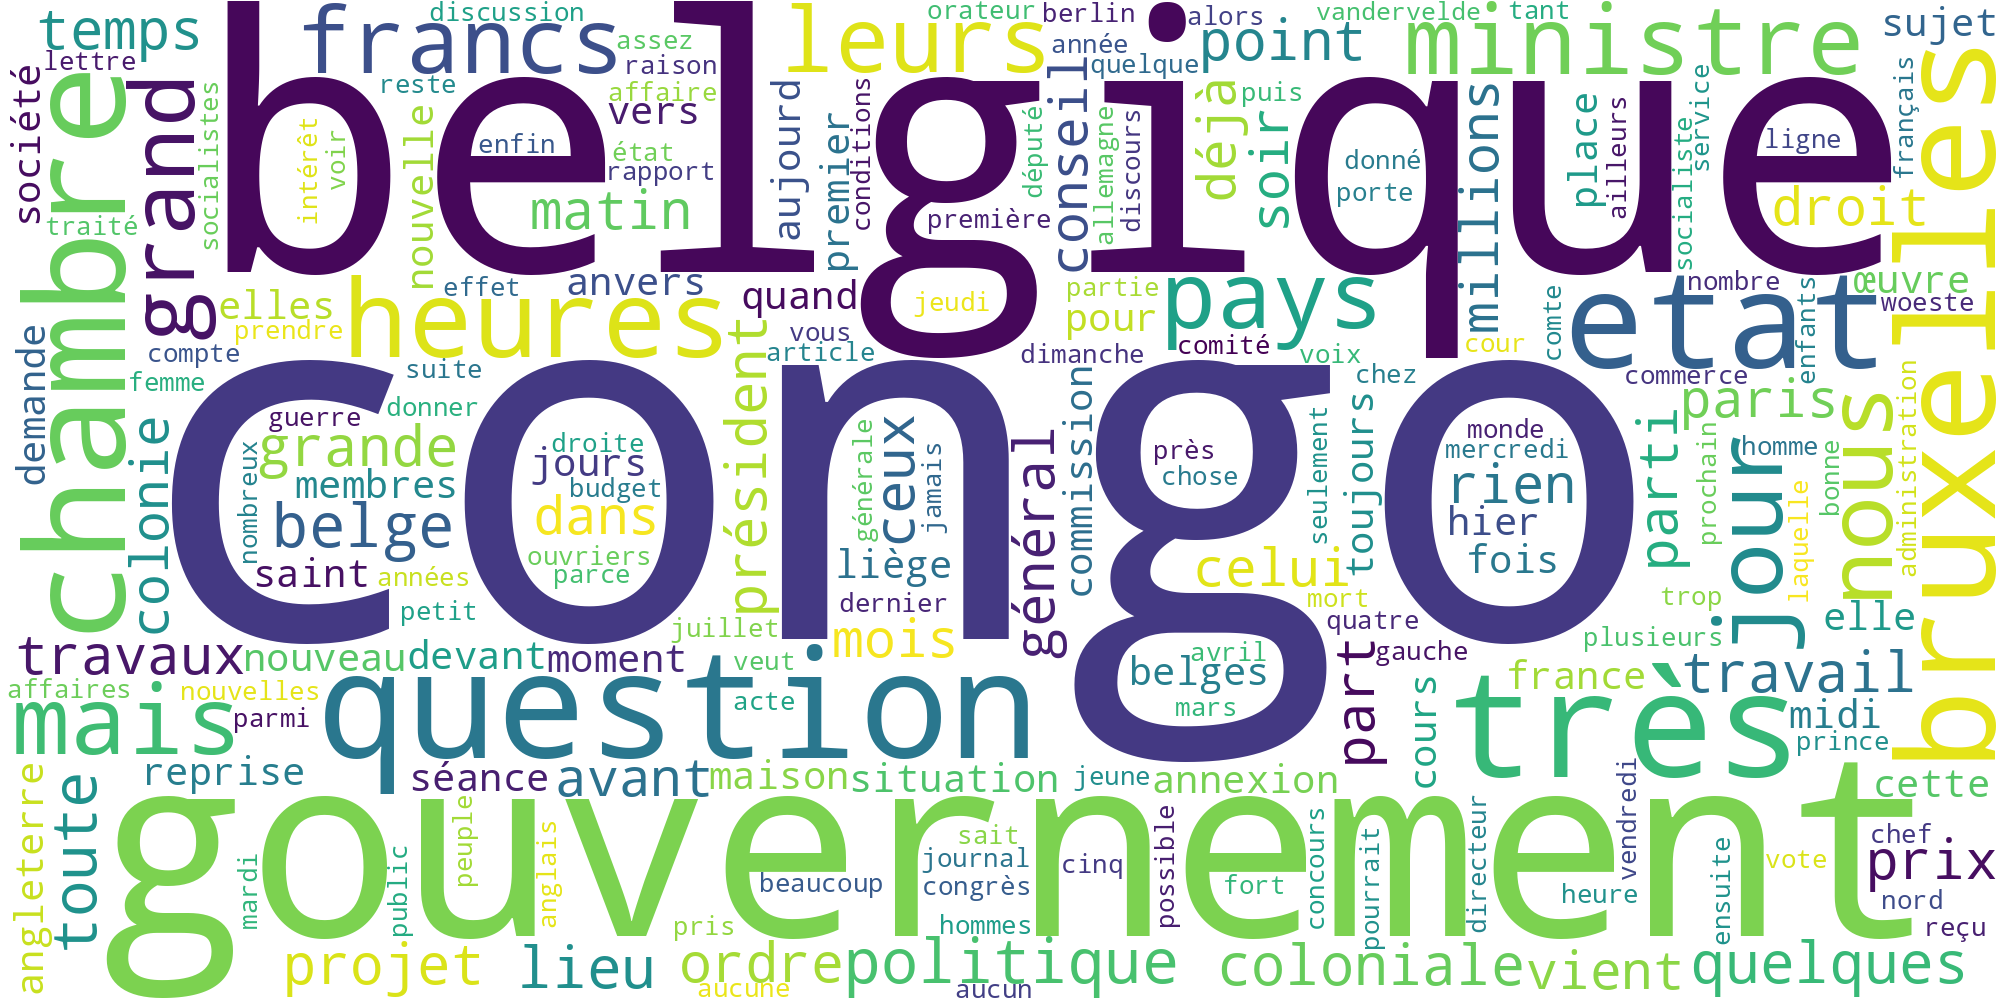

In [385]:
img = '../../data/corpus/tmp/png'
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(img, f"{year}.png"))
Image(filename=os.path.join(img, f"{year}.png"))